In [1]:
import mysql.connector
from mysql.connector import Error #By importing Error from mysql.connector, you can catch all errors that may occur when interacting with a MySQL database using the mysql.connector module.
from sqlalchemy import create_engine #The create_engine function is used to create a connection to a SQL database. It takes a database URL as an argument and returns an instance of an Engine class. The database URL specifies the location of the database and the credentials to use for authentication.
import pandas as pd

In [2]:
# Function to extract table to a pandas DataFrame
def extract_table_to_pandas(tablename, db_engine):
    query = "SELECT * FROM {}".format(tablename)
    return pd.read_sql(query, db_engine)

db_engine = create_engine('mysql+mysqlconnector://{0}:{1}@{2}/{3}'.
                                                   format('root', 'root', 
                                                          'localhost', 'elearning'))

In [3]:
#for intersection 
def print_user_comparison(user1, user2, user3):
    print("Course id overlap between users:")
    print("================================")
    print("User 1 and User 2 overlap: {}".format(
    set(user1.course_id) & set(user2.course_id)
    ))
    print("User 1 and User 3 overlap: {}".format(
    set(user1.course_id) & set(user3.course_id)
    ))
    print("User 2 and User 3 overlap: {}".format(
    set(user2.course_id) & set(user3.course_id)
    ))

In [4]:
# Get user with id 4387
user1 = pd.read_sql("SELECT * FROM rating where user_id=4387", db_engine)

# Get user with id 18163
user2 = pd.read_sql("SELECT * FROM rating where user_id=18163", db_engine)

# Get user with id 8770
user3 = pd.read_sql("SELECT * FROM rating where user_id=8770", db_engine)

# Use the helper function to compare the 3 users
print_user_comparison(user1, user2, user3)

Course id overlap between users:
User 1 and User 2 overlap: {32, 96, 36, 6, 7, 44, 95}
User 1 and User 3 overlap: set()
User 2 and User 3 overlap: set()


In [5]:
def extract_rating_data(db_engine):
    return pd.read_sql("SELECT * FROM rating", db_engine)

def extract_course_data(db_engine):
    return pd.read_sql("SELECT * FROM courses", db_engine)

In [6]:
ratings = extract_rating_data(db_engine)

course_data = extract_course_data(db_engine)

In [7]:
ratings.head()

,user_id,course_id,rating
0,1,6,4
1,1,36,5
2,1,37,5
3,1,45,5
4,1,50,5


In [8]:
course_data.head(7)

,course_id,title,description,programming_language
0,1,Machine Learning with Apache Spark,"Spark is a powerful, general purpose tool for ...",python
1,2,Financial Analytics in Spreadsheets,Monitoring the evolution of traded assets is k...,spreadsheets
2,3,Intermediate R,The intermediate R course is the logical next ...,r
3,4,Data Visualization with ggplot2 (Part 2),This ggplot2 tutorial builds on your knowledge...,r
4,5,Fraud Detection in R,The Association of Certified Fraud Examiners e...,r
5,6,Joining Data in SQL,Now that you've learned the basics of SQL in o...,sql
6,7,Introduction to Python,Python is a general-purpose programming langua...,python


In [9]:
ratings.user_id.nunique() #unique ids 

38174

In [10]:
# Print out the number of missing values per column
print(course_data.isnull().sum())

course_id               0
title                   0
description             0
programming_language    3
dtype: int64


In [11]:
# The transformation should fill in the missing values
def transform_fill_programming_language(course_data):
    imputed = course_data.fillna({"programming_language": "R"})
    return imputed

transformed = transform_fill_programming_language(course_data)

# Print out the number of missing values per column of transformed
print(transformed.isnull().sum())

course_id               0
title                   0
description             0
programming_language    0
dtype: int64


In [12]:
# transformation function
def transform_avg_rating(rating_data):
    """
    # Group by course_id and extract average rating per course 
    """
    avg_rating = rating_data.groupby('course_id').rating.mean()
    # Return sorted average ratings per course
    sort_rating = avg_rating.sort_values(ascending=False).reset_index()
    return sort_rating

In [13]:
# Use transform_avg_rating on the extracted data and print results
avg_course_ratings = transform_avg_rating(ratings)
print(avg_course_ratings) 

    course_id    rating
0          46  4.800000
1          23  4.800000
2          96  4.692765
3          56  4.661765
4          24  4.653061
..        ...       ...
94         54  4.238095
95         92  4.222222
96         29  4.208333
97         17  4.147059
98         42  4.107570

[99 rows x 2 columns]


In [14]:
# def get_courses_to_recommend(ratings, course_data):
#     user_list = ratings.user_id.unique()

#     course_set = set(course_data.course_id.unique())

#     non_enrolled_users = []

#     for user in user_list:
#         rated_course_set = set(ratings[ratings.user_id == user].course_id.unique())
#         non_enrolled_courses = course_set - rated_course_set
#         non_enrolled_users = non_enrolled_users + [(user, cid) for cid in non_enrolled_courses]
#         break
#     non_enrolled_courses_df = pd.DataFrame(non_enrolled_users, columns = ['user_id', 'course_id'])
#     return non_enrolled_courses_df

# courses_to_recommend = get_courses_to_recommend(ratings, course_data)
# courses_to_recommend.to_csv('courses_to_recommend.csv', index = False)
# courses_to_recommend.sample(n=500).to_csv('courses_to_recommend_small.csv', index = False)

In [15]:
course_data.shape

(100, 4)

In [16]:
pwd

'C:\\Users\\os\\Documents\\Python Scripts'

In [17]:
temp = pd.read_csv('courses_to_recommend_small.csv')  #courses_to_recommend.csv
temp.sample(n=500).to_csv('courses_to_recommend_small.csv', index = False)

In [18]:
courses_to_recommend = pd.read_csv('courses_to_recommend_small.csv')

courses_to_recommend.head()

,user_id,course_id
0,33409,89
1,18355,31
2,117,84
3,19473,40
4,22732,64


In [19]:
courses_to_recommend.groupby('user_id').count()

,course_id
user_id,
65,1
84,1
117,1
171,1
216,1
...,...
37693,1
37957,1
37992,1


In [20]:
# Complete the transformation function
def transform_recommendations(avg_course_ratings, courses_to_recommend):
    # Merge both DataFrames
    merged = courses_to_recommend.merge(avg_course_ratings) 
    
    # Sort values by rating and group by user_id
    grouped = merged.sort_values("rating", ascending=False).groupby("user_id")
    
    # Produce the top 3 values and sort by user_id
    recommendations = grouped.head(3).sort_values("user_id").reset_index()
    
    final_recommendations = recommendations[["user_id", "course_id","rating"]]
    
    # Return final recommendations
    return final_recommendations


# Use the function with the predefined DataFrame objects
recommendations = transform_recommendations(avg_course_ratings, courses_to_recommend)

In [21]:
# Merge both DataFrames
merged = courses_to_recommend.merge(avg_course_ratings) 

merged.head()

,user_id,course_id,rating
0,33409,89,4.338462
1,18279,89,4.338462
2,29332,89,4.338462
3,18355,31,4.610209
4,32534,31,4.610209


In [22]:
merged.sort_values("rating", ascending=False).head()

,user_id,course_id,rating
111,18559,46,4.8
112,23094,46,4.8
148,11617,23,4.8
110,6785,46,4.8
147,30075,23,4.8


In [23]:
merged[merged.user_id == 30251]

,user_id,course_id,rating
163,30251,72,4.340278


In [24]:
# Sort values by rating and group by user_id
grouped = merged.sort_values("rating", ascending=False).groupby("user_id")


# Produce the top 3 values and sort by user_id
recommendations = grouped.head(3).sort_values("user_id")

recommendations.head()

,user_id,course_id,rating
313,65,2,4.253012
452,84,14,4.593220
11,117,84,4.461538
236,171,56,4.661765
412,216,79,4.395833


In [25]:
recommendations[recommendations.user_id == 84]

,user_id,course_id,rating
452,84,14,4.59322


In [26]:
recommendations = transform_recommendations(avg_course_ratings, courses_to_recommend)

In [27]:
db_engine = create_engine('mysql+mysqlconnector://{0}:{1}@{2}/{3}'.
                                                   format('root', 'root', 
                                                          'localhost', 'elearning'))

def load_to_dwh(recommendations, db_engine):
    recommendations.to_sql("recommendations", db_engine, if_exists="replace")

In [28]:
load_to_dwh(recommendations, db_engine)

In [29]:
def recommendations_for_user(user_id, threshold=4.5):
    # Join with the courses table
    query = """
    SELECT title, rating FROM recommendations
    INNER JOIN courses ON courses.course_id = recommendations.course_id
    WHERE user_id=%(user_id)s AND rating>%(threshold)s
    ORDER BY rating DESC
    """
    # Add the threshold parameter
    predictions_df = pd.read_sql(query, db_engine, params = {"user_id": user_id, 
                                                           "threshold": threshold})
    return predictions_df.title.values

# Try the function you created
print(recommendations_for_user(171, 4.0)) #(44, 4.0)

['Extreme Gradient Boosting with XGBoost']


## ETL: Combine all the operations

In [30]:
def etl(db_engine):
    # Extract the data
    courses = extract_course_data(db_engine)
    rating = extract_rating_data(db_engine)
    
    # Clean up courses data
    courses = transform_fill_programming_language(courses)
    
    # Get the average course ratings
    avg_course_rating = transform_avg_rating(rating)
    
    # Get eligible user and course id pairs
    courses_to_recommend = pd.read_csv('courses_to_recommend_small.csv')
    
    # Calculate the recommendations
    recommendations = transform_recommendations(
    avg_course_rating,
    courses_to_recommend,
    )
    
    # Load the recommendations into the database
    load_to_dwh(recommendations, db_engine)

In [31]:
etl(db_engine)

## Assignment

1. Recommend courses based on programming_language.
   - Build a logic and create flolwchart of it.
   - Write the code for it in python/sql.

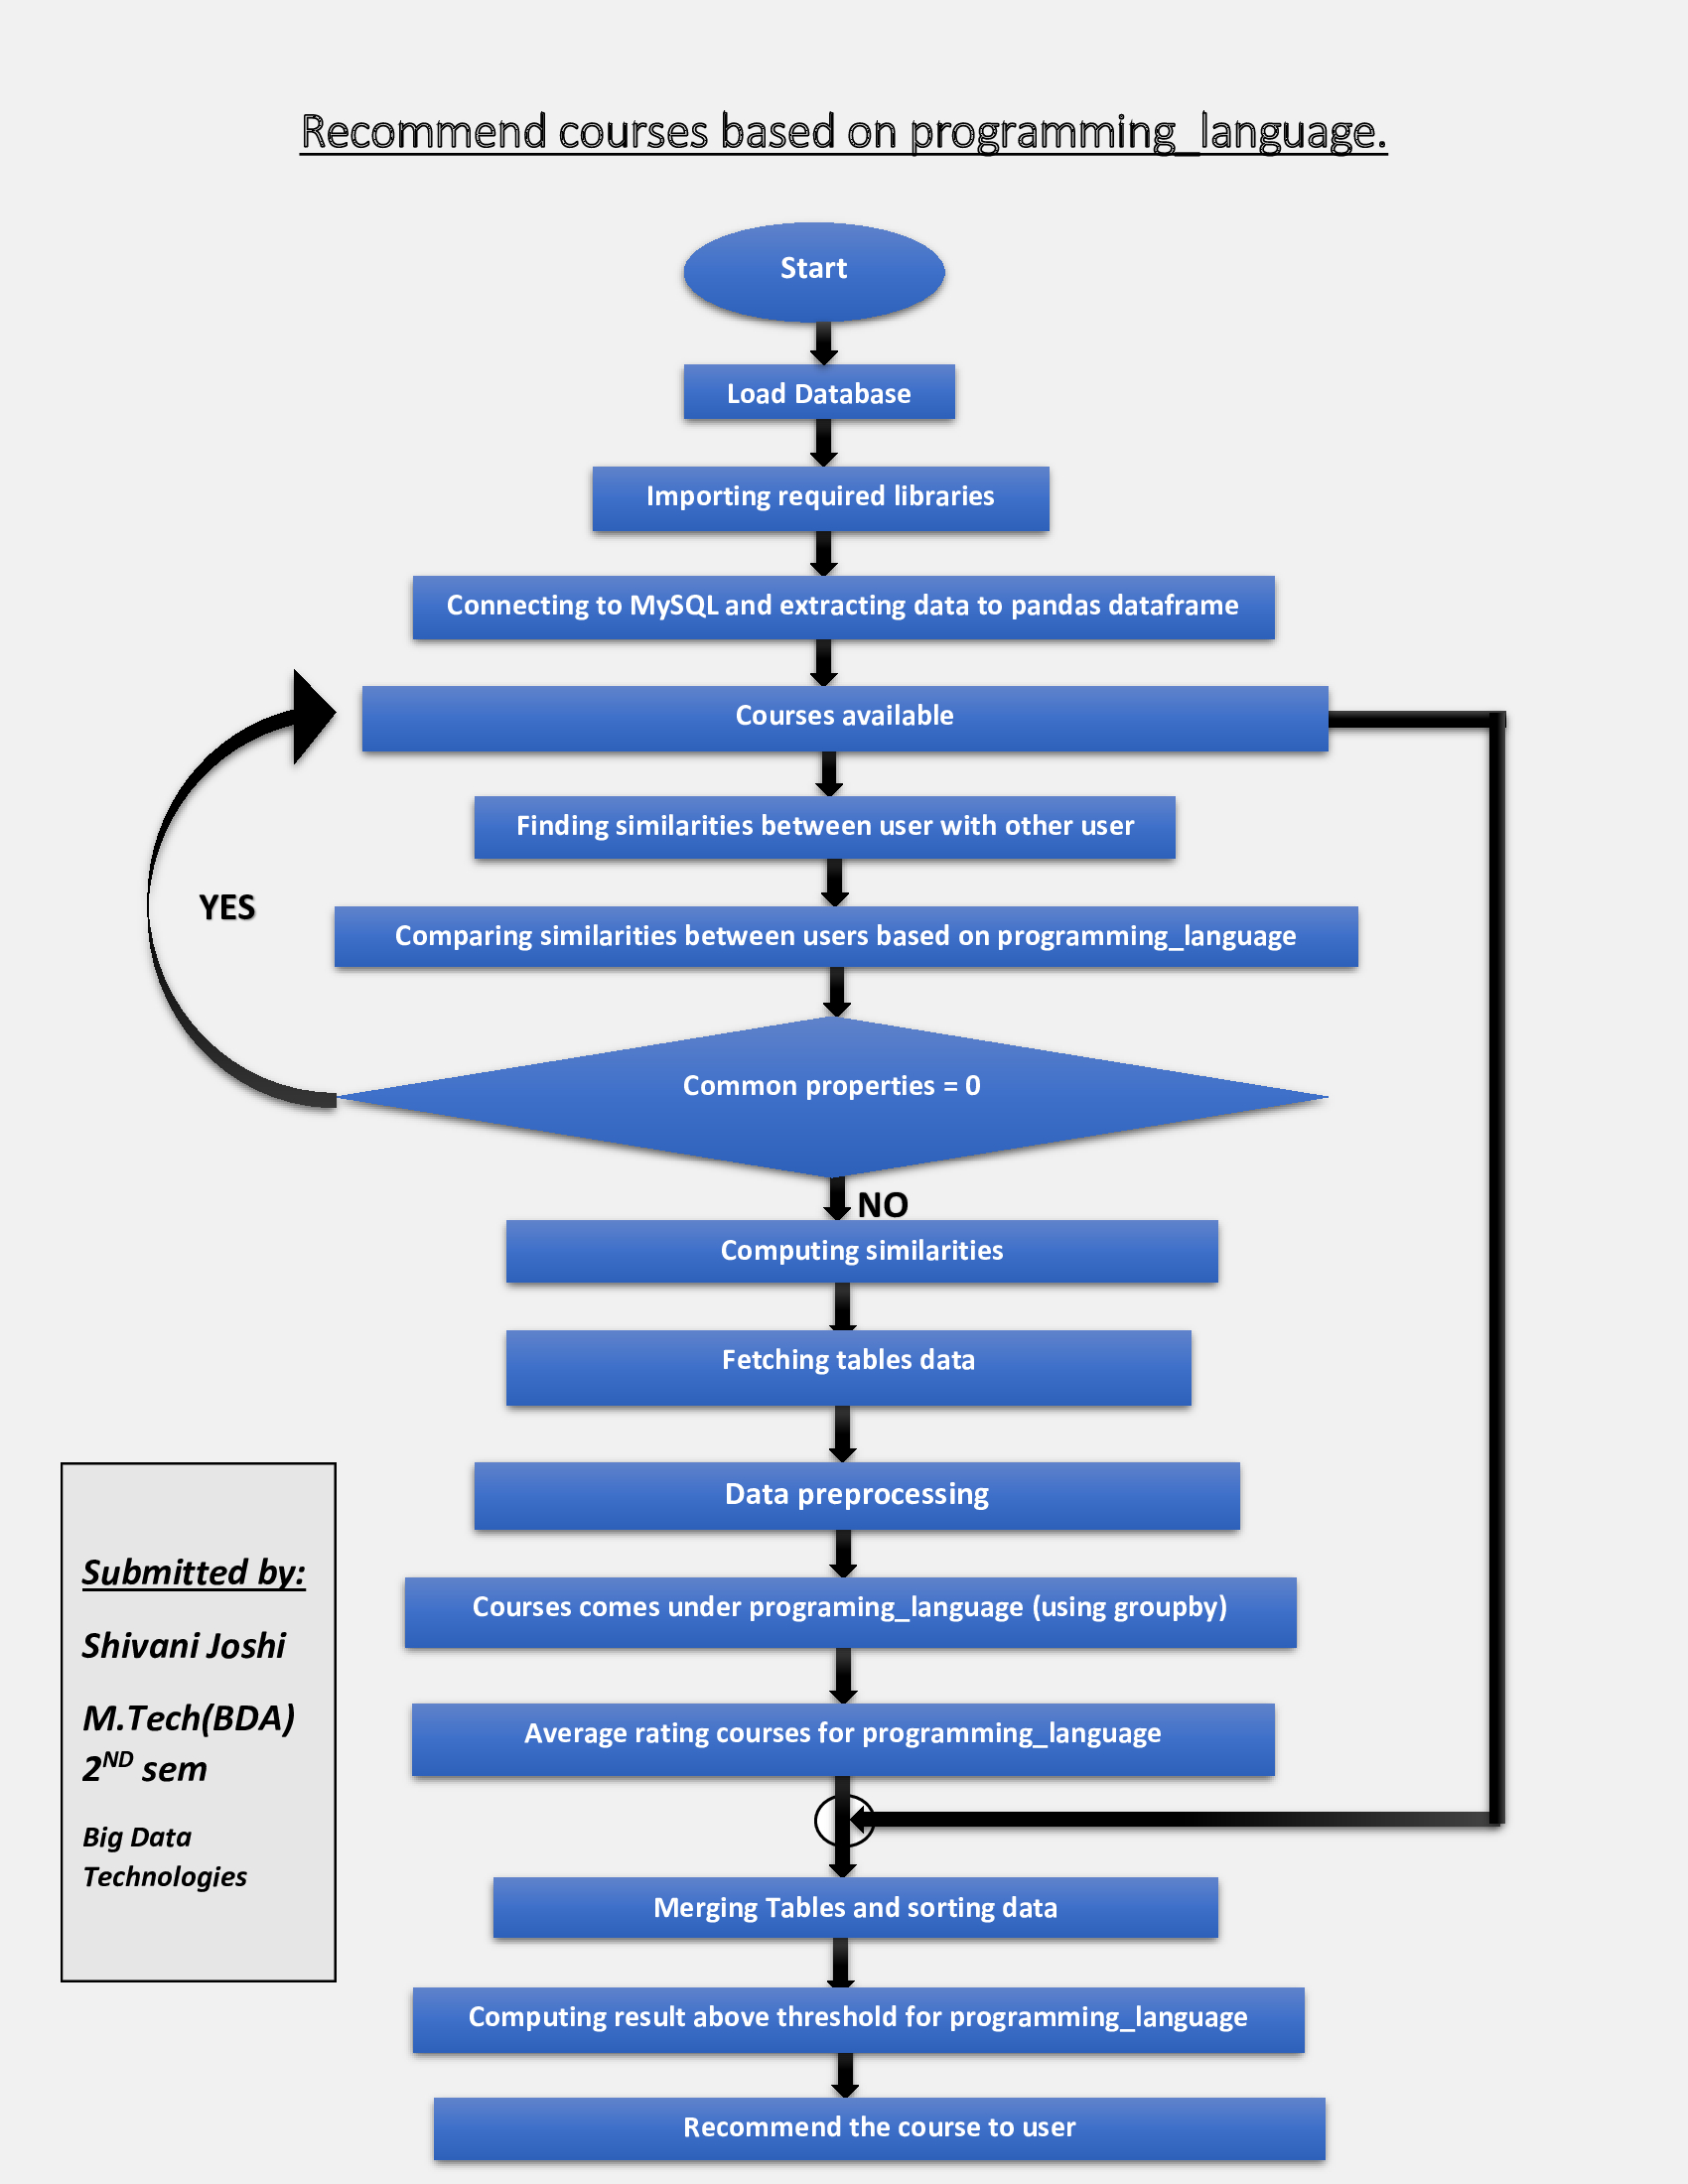

In [33]:
merged_table = pd.merge(course_data, ratings, on="course_id")

In [34]:
merged_table

,course_id,title,description,programming_language,user_id,rating
0,1,Machine Learning with Apache Spark,"Spark is a powerful, general purpose tool for ...",python,289,5
1,1,Machine Learning with Apache Spark,"Spark is a powerful, general purpose tool for ...",python,318,5
2,1,Machine Learning with Apache Spark,"Spark is a powerful, general purpose tool for ...",python,344,4
3,1,Machine Learning with Apache Spark,"Spark is a powerful, general purpose tool for ...",python,412,4
4,1,Machine Learning with Apache Spark,"Spark is a powerful, general purpose tool for ...",python,448,4
...,...,...,...,...,...,...
59167,100,Working with Dates and Times in Python,"You'll probably never have a time machine, but...",python,31423,5
59168,100,Working with Dates and Times in Python,"You'll probably never have a time machine, but...",python,32496,5
59169,100,Working with Dates and Times in Python,"You'll probably never have a time machine, but...",python,33107,5
59170,100,Working with Dates and Times in Python,"You'll probably never have a time machine, but...",python,33777,4


In [35]:
cols = merged_table[["course_id","title","programming_language","rating"]]
cols

,course_id,title,programming_language,rating
0,1,Machine Learning with Apache Spark,python,5
1,1,Machine Learning with Apache Spark,python,5
2,1,Machine Learning with Apache Spark,python,4
3,1,Machine Learning with Apache Spark,python,4
4,1,Machine Learning with Apache Spark,python,4
...,...,...,...,...
59167,100,Working with Dates and Times in Python,python,5
59168,100,Working with Dates and Times in Python,python,5
59169,100,Working with Dates and Times in Python,python,5
59170,100,Working with Dates and Times in Python,python,4


In [56]:
print(course_data.isnull().sum())

course_id               0
title                   0
description             0
programming_language    3
dtype: int64


In [57]:
def transform_fill_programming_language(course_data):
    imputed = course_data.fillna({"programming_language": "R"})
    return imputed

transformed = transform_fill_programming_language(course_data)

# Print out the number of missing values per column of transformed
print(transformed.isnull().sum())

course_id               0
title                   0
description             0
programming_language    0
dtype: int64


In [58]:
def transform_rating(rating_data):
    """
    # Group by course_id and extract average rating per course 
    """
    avg_ratings = rating_data.groupby('programming_language').rating.mean()
    # Return sorted average ratings per course
    sort_ratings = avg_ratings.sort_values(ascending=False).reset_index()
    return sort_ratings

In [59]:
avg_ratings = transform_rating(cols)
print(avg_ratings)

  programming_language    rating
0                  sql  4.580125
1               python  4.560493
2                    r  4.511917
3         spreadsheets  4.272727
4                shell  4.231259


In [77]:
merged_table = pd.merge(course_data, avg_ratings, on="programming_language")

In [78]:
merged_table

,course_id,title,description,programming_language,rating
0,1,Machine Learning with Apache Spark,"Spark is a powerful, general purpose tool for ...",python,4.560493
1,7,Introduction to Python,Python is a general-purpose programming langua...,python,4.560493
2,14,Intro to Portfolio Risk Management in Python,This course will teach you how to evaluate bas...,python,4.560493
3,17,Analyzing US Census Data in Python,"Data scientists in diverse fields, from market...",python,4.560493
4,18,Network Analysis in Python (Part 1),From online social networks such as Facebook a...,python,4.560493
...,...,...,...,...,...
92,70,Introduction to Relational Databases in SQL,You have already used SQL for querying data fr...,sql,4.580125
93,96,Intro to SQL for Data Science,The role of a data scientist is to turn raw da...,sql,4.580125
94,20,Introduction to Git for Data Science,Version control is one of the power tools of p...,shell,4.231259
95,42,Conda Essentials,"Software is constantly evolving, so data scien...",shell,4.231259


In [86]:
cols = merged_table[["course_id","title","programming_language","rating"]]
cols

,course_id,title,programming_language,rating
0,1,Machine Learning with Apache Spark,python,4.560493
1,7,Introduction to Python,python,4.560493
2,14,Intro to Portfolio Risk Management in Python,python,4.560493
3,17,Analyzing US Census Data in Python,python,4.560493
4,18,Network Analysis in Python (Part 1),python,4.560493
...,...,...,...,...
92,70,Introduction to Relational Databases in SQL,sql,4.580125
93,96,Intro to SQL for Data Science,sql,4.580125
94,20,Introduction to Git for Data Science,shell,4.231259
95,42,Conda Essentials,shell,4.231259


In [80]:
test = pd.read_csv('courses_to_recommend_small.csv')  #courses_to_recommend.csv
test.sample(n=500).to_csv('courses_to_recommend_small.csv', index = False)

In [81]:
courses_recommend = pd.read_csv('courses_to_recommend_small.csv')

courses_recommend.head()

,user_id,course_id
0,33274,53
1,25940,95
2,35810,8
3,31116,36
4,27957,71


In [82]:
courses_recommend.groupby('user_id').count()

,course_id
user_id,
65,1
84,1
117,1
171,1
216,1
...,...
37693,1
37957,1
37992,1


In [87]:
# Complete the transformation function
def trans_recommendations(cols, courses_recommend):
    # Merge both DataFrames
    merged = courses_recommend.merge(cols)
    
    # Sort values by rating and group by user_id
    grouped = merged.sort_values("rating", ascending=False).groupby("user_id")
    
    # Produce the top 3 values and sort by user_id
    recommendations = grouped.head(3).sort_values("user_id").reset_index()
    
    final_recommendations = recommendations[["user_id", "course_id","programming_language","rating"]]
    
    # Return final recommendations
    return final_recommendations


# Use the function with the predefined DataFrame objects
recommendations = trans_recommendations(cols, courses_recommend)

print(recommendations)

     user_id  course_id programming_language    rating
0         65          2         spreadsheets  4.272727
1         84         14               python  4.560493
2        117         84                    r  4.511917
3        171         56               python  4.560493
4        216         79                    r  4.511917
..       ...        ...                  ...       ...
480    37404          2         spreadsheets  4.272727
481    37406         38                    r  4.511917
482    37693         47                    r  4.511917
483    37992         36               python  4.560493
484    38152         83                    r  4.511917

[485 rows x 4 columns]


In [90]:
# Merge both DataFrames
merged = courses_recommend.merge(cols) 

merged.head()

,user_id,course_id,title,programming_language,rating
0,33274,53,Interactive Data Visualization with plotly in R,r,4.511917
1,4251,53,Interactive Data Visualization with plotly in R,r,4.511917
2,25940,95,Python Data Science Toolbox (Part 2),python,4.560493
3,27986,95,Python Data Science Toolbox (Part 2),python,4.560493
4,25779,95,Python Data Science Toolbox (Part 2),python,4.560493


In [91]:
merged.sort_values("rating", ascending=False).head()

,user_id,course_id,title,programming_language,rating
465,14086,68,Analyzing Business Data in SQL,sql,4.580125
271,17213,6,Joining Data in SQL,sql,4.580125
468,25875,68,Analyzing Business Data in SQL,sql,4.580125
467,11045,68,Analyzing Business Data in SQL,sql,4.580125
466,22524,68,Analyzing Business Data in SQL,sql,4.580125


In [92]:
merged[merged.user_id == 30251]

,user_id,course_id,title,programming_language,rating
451,30251,72,Natural Language Processing Fundamentals in Py...,python,4.560493


In [93]:
# Sort values by rating and group by user_id
grouped = merged.sort_values("rating", ascending=False).groupby("user_id")


# Produce the top 3 values and sort by user_id
recommendations = grouped.head(3).sort_values("rating")

recommendations.head()

,user_id,course_id,title,programming_language,rating
204,1713,42,Conda Essentials,shell,4.231259
280,13290,82,Conda for Building & Distributing Packages,shell,4.231259
89,4773,20,Introduction to Git for Data Science,shell,4.231259
90,19294,20,Introduction to Git for Data Science,shell,4.231259
91,35938,20,Introduction to Git for Data Science,shell,4.231259


In [94]:
recommendations[recommendations.user_id == 84]

,user_id,course_id,title,programming_language,rating
329,84,14,Intro to Portfolio Risk Management in Python,python,4.560493


In [98]:
recommendations[recommendations.user_id == 8175 ]

,user_id,course_id,title,programming_language,rating
53,8175,66,Visualizing Time Series Data in Python,python,4.560493


In [99]:
recommendations[recommendations.user_id == 25616]

,user_id,course_id,title,programming_language,rating
192,25616,3,Intermediate R,r,4.511917


In [108]:
recommendations[recommendations.user_id == 31369]

,user_id,course_id,title,programming_language,rating
160,31369,60,Data Science for Managers,r,4.511917
